In [ ]:
!pip install qiskit pylatexenc

Below we put together a two-qubit quantum circuit (with default inputs).

Its purpose is to create an equal superposition of

(a) $|0\rangle$ and

(b) an equal superposition of $|2\rangle$ and $|3\rangle$.

That is, we want to create this state: $$\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|1\rangle \big(\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle\big)$$

In [2]:
from qiskit import QuantumCircuit

I can argue that the following circuit clearly, transparently builds that state.

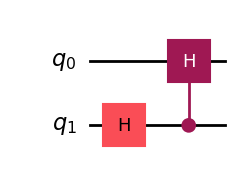

In [3]:
qc = QuantumCircuit(2)
qc.h(1)
qc.ch(1,0)
qc.draw(output='mpl')

We can confirm that we obtain the desired output as follows:

In [4]:
from qiskit.quantum_info import Statevector
sv = Statevector.from_instruction(qc)
sv.draw('latex')

<IPython.core.display.Latex object>

What if we want a similar one-qubit quantum circuit?

The circuit should create an equal superposition of:

(a) $|0\rangle$ and

(b) $|+⟩$ (which is an equal superposition of $|0\rangle$ and $|1\rangle$)

The state we want to create is:

$$\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}\big( \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle\big)$$

Notice this state is not normalized.

When we normalize we get:

$$\frac{\sqrt{2 + \sqrt{2}}}{2}|0\rangle + \frac{\sqrt{2 - \sqrt{2}}}{2}|1\rangle = \cos{\frac{\pi}{8}}|0\rangle + \sin{\frac{\pi}{8}}|1\rangle$$

The chance of measuring a $|0\rangle$ in this state is about $0.854$ (In the previous circuit the probabilities were $0.5$, $0.25$ and $0.25$ for the three possible measurement outcomes. Here, though, the two $|0\rangle$ combine into more than $0.75$ probability for a total of about $0.854$)

Can we create this state with simple, fundamental one-qubit gates?

Can it be realized as a circuit in the misty state formalism?

The answer is : no, as we can see below.

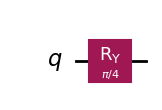

In [5]:
import numpy as np

# Creating a Quantum Circuit with 2 Qubits
circuit = QuantumCircuit(1)

# Applying RY Gate on the first Qubit with parameter pi/2
circuit.ry(np.pi/4, 0)

# Drawing the Quantum Circuit
circuit.draw(output='mpl')

In [6]:
sv = Statevector.from_instruction(circuit)
sv.draw('latex')

<IPython.core.display.Latex object>

In [7]:
from qiskit.quantum_info import Operator
Operator.from_circuit(circuit).draw(output='latex')

<IPython.core.display.Latex object>

Statevector([0.92387953+0.j, 0.38268343+0.j],
            dims=(2,))


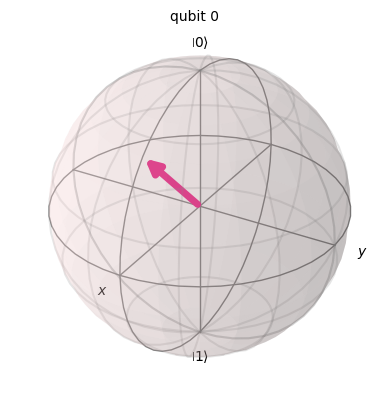

In [9]:
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(1) # ,1)

qc.h(0)
qc.ry(np.pi/4, 0)
qc.x(0)

outState = Statevector.from_instruction(qc)

print(outState)

plot_bloch_multivector(outState)

In [10]:
outState.draw('latex')

<IPython.core.display.Latex object>

And now a drawing:

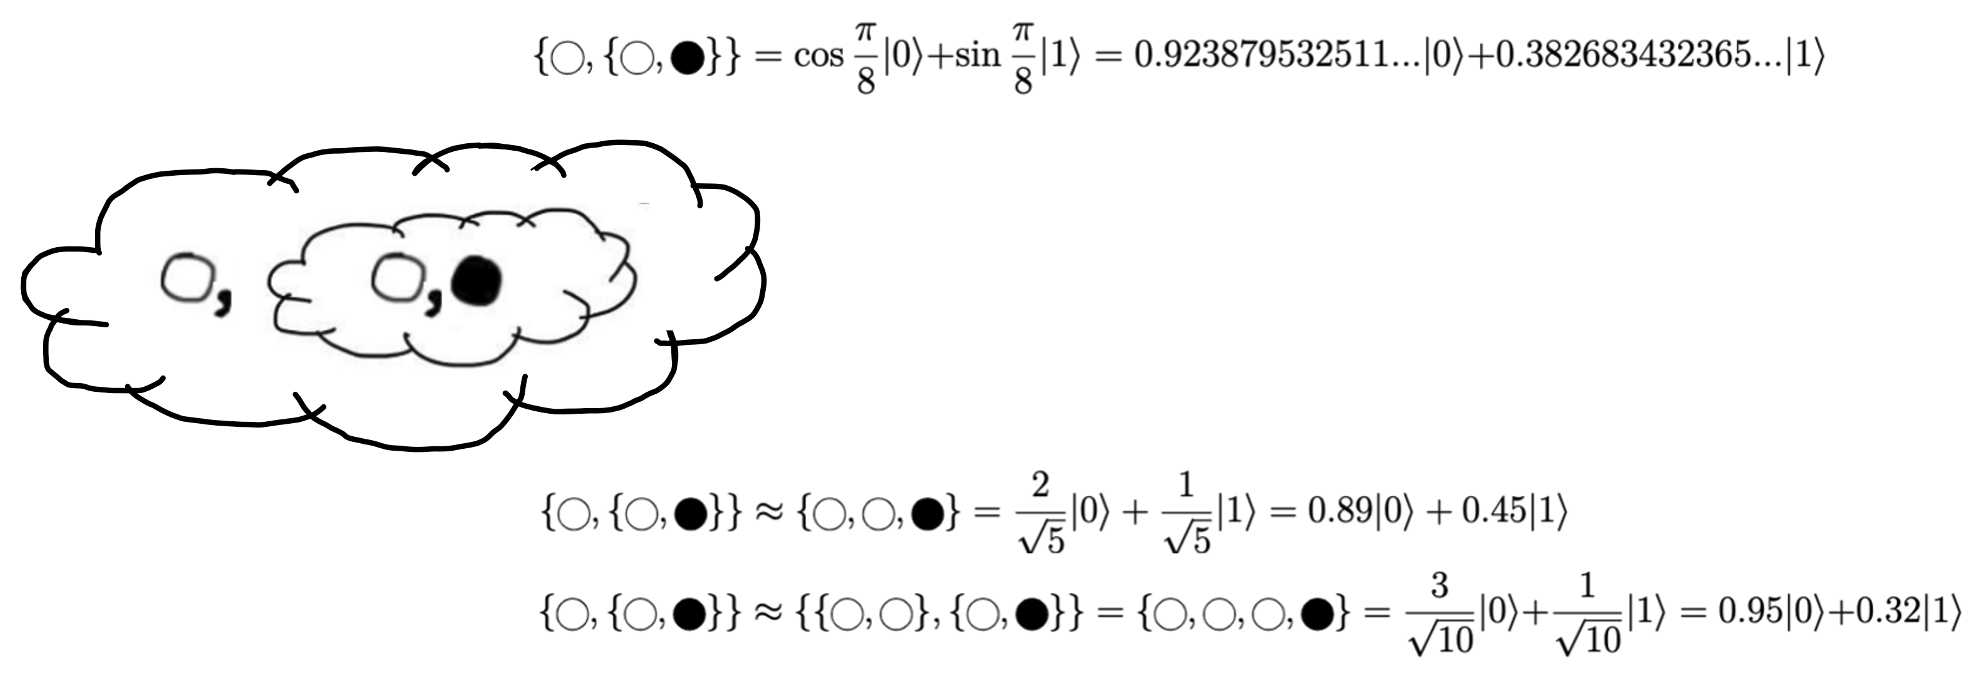

So now we see why the original state is unrealizable in the misty state formalism. But we can draw it. And its two most likely reductions (the simple, naive one, and the slightly more correct variation) result in the closest two approximations, though none of them preserves the initial accuracy (but they're ever so close).